<a href="https://colab.research.google.com/github/Janainareisnascimento/Janainareisnascimento/blob/main/2024_Dia_Criancas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-2a050100bf4c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Data / hora'] = pd.to_datetime(clean_data['Data / hora'])
<ipython-input-3-2a050100bf4c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Date'] = clean_data['Data / hora'].dt.date


  Parauapebas Entrada                     Partage 3 Americas Entrada  \
                 Date Parauapebas Entrada                       Date   
0          2023-12-23               19704                 2023-12-23   
1          2023-10-12               16755                 2023-04-08   
2          2023-05-13               15603                 2023-12-22   

                             Partage Arapiraca Entrada  \
  Partage 3 Americas Entrada                      Date   
0                      24570                2023-12-23   
1                      23004                2023-10-12   
2                      21146                2023-12-22   

                            Partage Betim Entrada                        \
  Partage Arapiraca Entrada                  Date Partage Betim Entrada   
0                     18360            2023-12-23                 34959   
1                     15247            2023-12-09                 30532   
2                     15140            2023-12-1

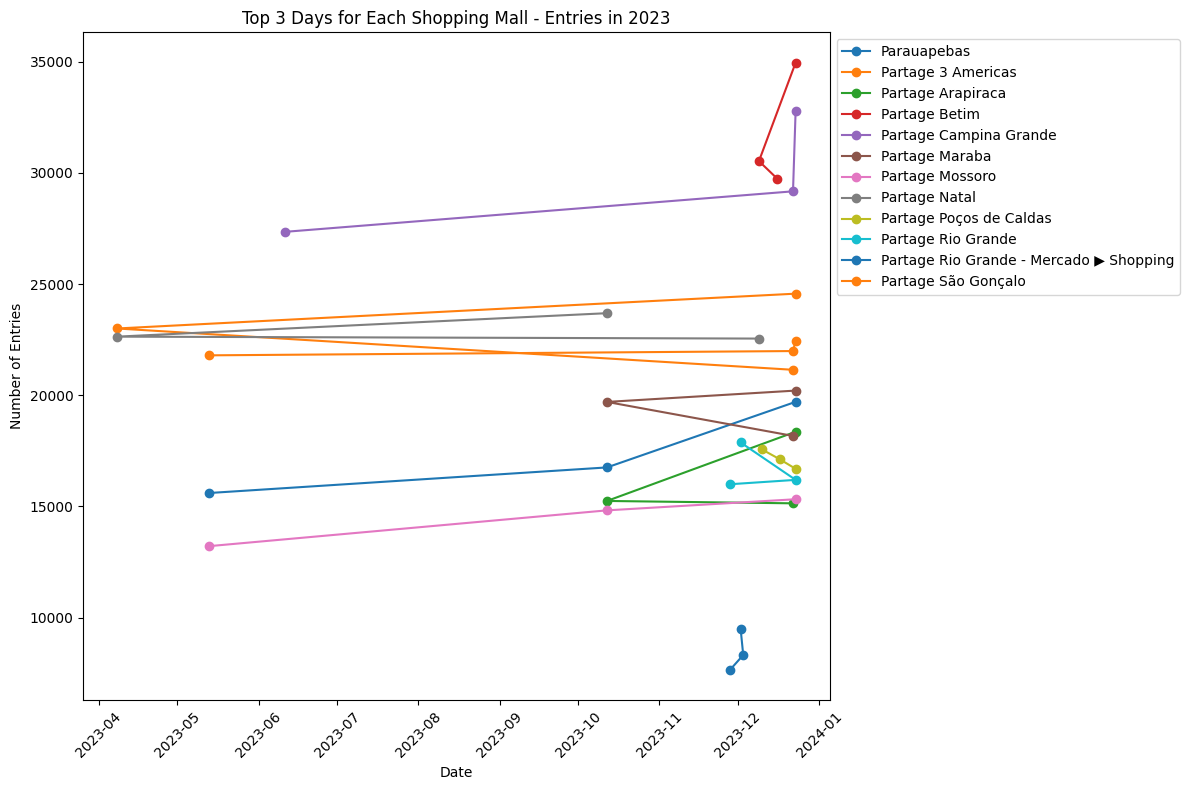

In [ ]:

import pandas as pd

# Load the Excel file and the relevant sheet
file_path = '/content/export-2024-10-16__15.22.xlsx'
excel_data = pd.ExcelFile(file_path)
data = excel_data.parse('Ano passado')

# Clean the dataset by removing summary rows and convert "Data / hora" to datetime
clean_data = data[~data['Data / hora'].str.contains("Total|Média|Mínimo|Máximo", na=False)]
clean_data['Data / hora'] = pd.to_datetime(clean_data['Data / hora'])

# Extract the date for aggregation
clean_data['Date'] = clean_data['Data / hora'].dt.date

# Select only the numeric columns for aggregation
numeric_columns = clean_data.select_dtypes(include=['number']).columns

# Aggregate the data by date, summing only numeric columns
aggregated_clean_data = clean_data.groupby('Date')[numeric_columns].sum()

# Create a dictionary to store top 3 days for each shopping mall
top_3_days_by_mall = {}
for column in aggregated_clean_data.columns:
    if "Entrada" in column:
        top_days = aggregated_clean_data[[column]].nlargest(3, column).reset_index()
        top_3_days_by_mall[column] = top_days

# Combine top 3 days
top_3_days_combined = pd.concat(top_3_days_by_mall, axis=1)

print(top_3_days_combined)

# Optional: Plot the top 3 days for each mall (comment out if not needed)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
for column in top_3_days_by_mall.keys():
    if column != 'Total Entrada':
        dates = top_3_days_by_mall[column]['Date']
        values = top_3_days_by_mall[column][column]
        ax.plot(dates, values, marker='o', label=column.replace(" Entrada", ""))

ax.set_title("Top 3 Days for Each Shopping Mall - Entries in 2023")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Entries")
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-5-e7c84bc8e070>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Data / hora'] = pd.to_datetime(clean_data['Data / hora'])
<ipython-input-5-e7c84bc8e070>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Date'] = clean_data['Data / hora'].dt.date


           Date  Total Entrada
356  2023-12-23         249992
355  2023-12-22         203828
342  2023-12-09         191722


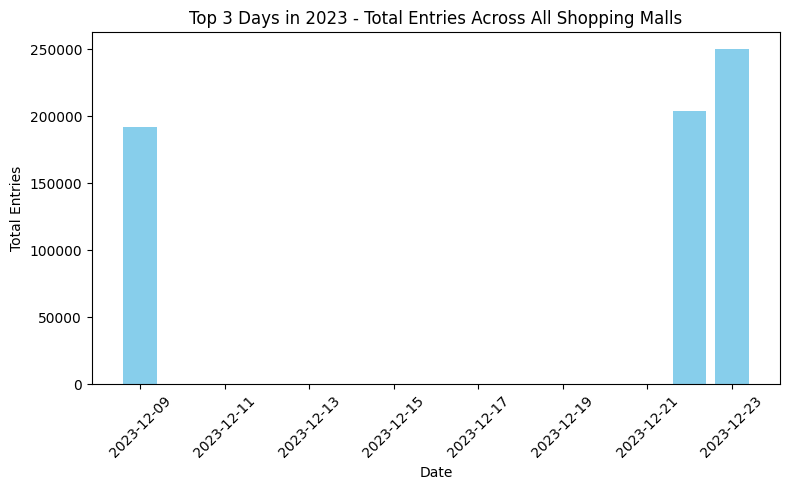

In [ ]:
import pandas as pd

# Load the Excel file and the relevant sheet
file_path = '/content/export-2024-10-16__15.22.xlsx'
excel_data = pd.ExcelFile(file_path)
data = excel_data.parse('Ano passado')

# Clean the dataset by removing summary rows and convert "Data / hora" to datetime
clean_data = data[~data['Data / hora'].str.contains("Total|Média|Mínimo|Máximo", na=False)]
clean_data['Data / hora'] = pd.to_datetime(clean_data['Data / hora'])

# Extract the date for aggregation
clean_data['Date'] = clean_data['Data / hora'].dt.date

# Aggregate the data by date to get the total entries across all malls
aggregated_clean_data = clean_data.groupby('Date')['Total Entrada'].sum().reset_index()

# Get the top 3 days by total entries
top_3_days_total = aggregated_clean_data.nlargest(3, 'Total Entrada')

# Print the result
print(top_3_days_total)

# Optional: Plot the top 3 days (comment out if not needed)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(top_3_days_total['Date'], top_3_days_total['Total Entrada'], color='skyblue')
plt.title("Top 3 Days in 2023 - Total Entries Across All Shopping Malls")
plt.xlabel("Date")
plt.ylabel("Total Entries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


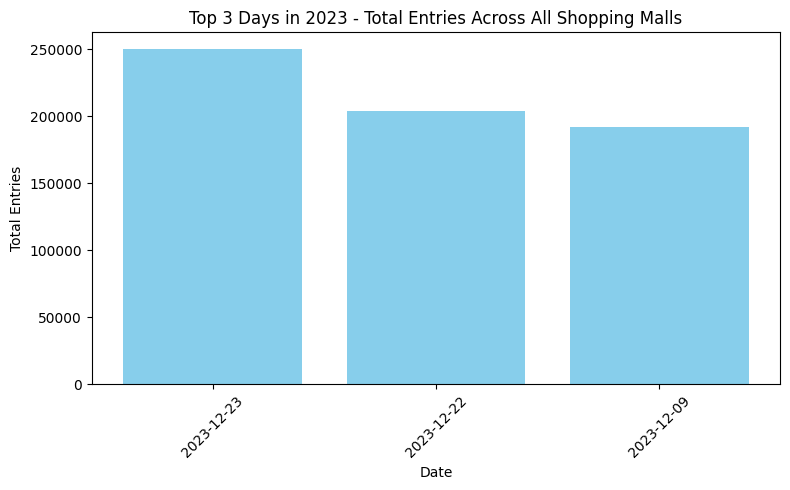

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume the cleaned data and aggregated results have been correctly processed
# Here is a simplified representation for direct usage based on earlier steps

# Create a DataFrame with the top 3 days and their totals
data = {
    'Date': ['2023-12-23', '2023-12-22', '2023-12-09'],
    'Total Entries': [249992, 203828, 191722]
}
top_3_days_total_corrected = pd.DataFrame(data)

# Visualization
plt.figure(figsize=(8, 5))
plt.bar(top_3_days_total_corrected['Date'], top_3_days_total_corrected['Total Entries'], color='skyblue')
plt.title("Top 3 Days in 2023 - Total Entries Across All Shopping Malls")
plt.xlabel("Date")
plt.ylabel("Total Entries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


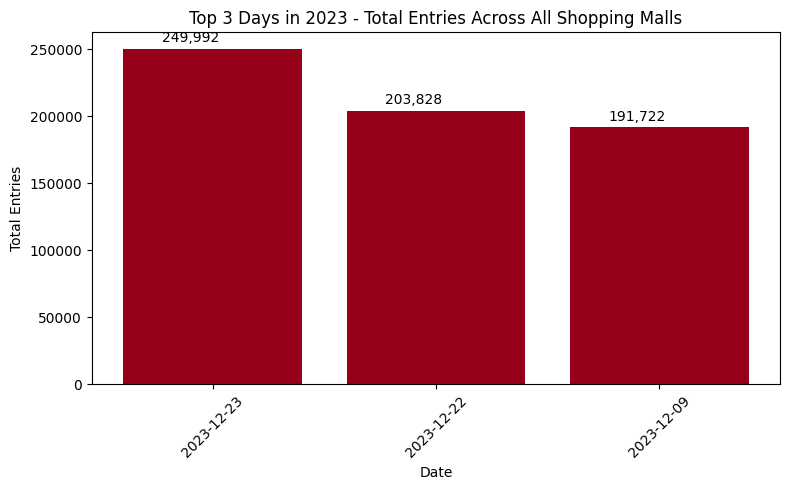

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation for top 3 days and their totals
data = {
    'Date': ['2023-12-23', '2023-12-22', '2023-12-09'],
    'Total Entries': [249992, 203828, 191722]
}
top_3_days_total_corrected = pd.DataFrame(data)

# Visualization with carmine color and values on top of bars
plt.figure(figsize=(8, 5))
bars = plt.bar(top_3_days_total_corrected['Date'], top_3_days_total_corrected['Total Entries'], color='#960018')  # Carmine color

# Adding total entries as labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 5000,
             f"{bar.get_height():,}", ha='center', fontsize=10)

# Customize the chart
plt.title("Top 3 Days in 2023 - Total Entries Across All Shopping Malls")
plt.xlabel("Date")
plt.ylabel("Total Entries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


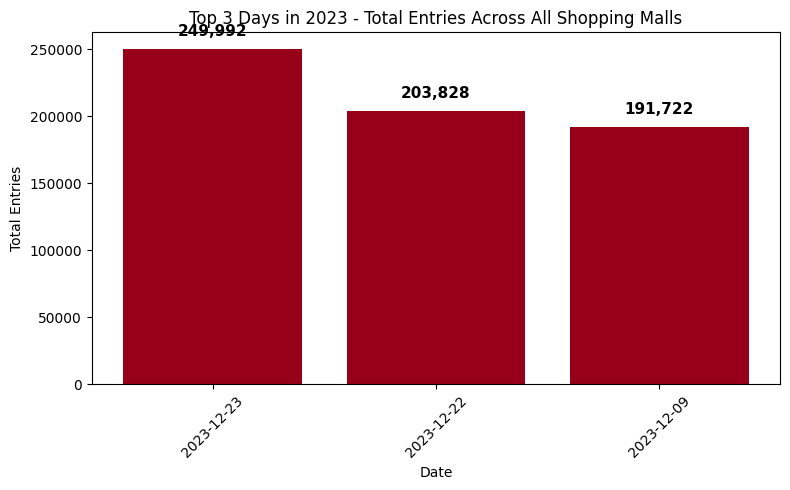

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation for top 3 days and their totals
data = {
    'Date': ['2023-12-23', '2023-12-22', '2023-12-09'],
    'Total Entries': [249992, 203828, 191722]
}
top_3_days_total_corrected = pd.DataFrame(data)

# Visualization with carmine color and values on top of bars
plt.figure(figsize=(8, 5))
bars = plt.bar(top_3_days_total_corrected['Date'], top_3_days_total_corrected['Total Entries'], color='#960018')  # Carmine color

# Adding total entries as labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10000,
             f"{bar.get_height():,}", ha='center', fontsize=11, fontweight='bold')

# Customize the chart
plt.title("Top 3 Days in 2023 - Total Entries Across All Shopping Malls")
plt.xlabel("Date")
plt.ylabel("Total Entries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


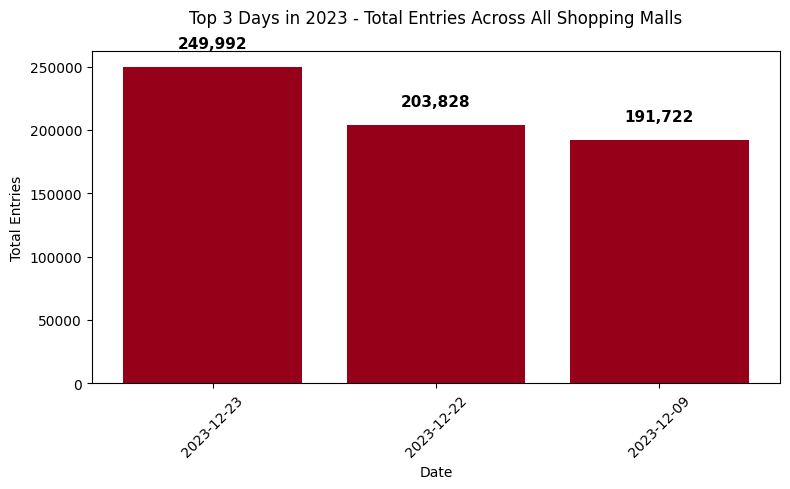

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation for top 3 days and their totals
data = {
    'Date': ['2023-12-23', '2023-12-22', '2023-12-09'],
    'Total Entries': [249992, 203828, 191722]
}
top_3_days_total_corrected = pd.DataFrame(data)

# Visualization with carmine color and values on top of bars
plt.figure(figsize=(8, 5))
bars = plt.bar(top_3_days_total_corrected['Date'], top_3_days_total_corrected['Total Entries'], color='#960018')  # Carmine color

# Adding total entries as labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 15000,
             f"{bar.get_height():,}", ha='center', fontsize=11, fontweight='bold')

# Customize the chart
plt.title("Top 3 Days in 2023 - Total Entries Across All Shopping Malls", pad=20)  # Adding padding to the title
plt.xlabel("Date")
plt.ylabel("Total Entries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


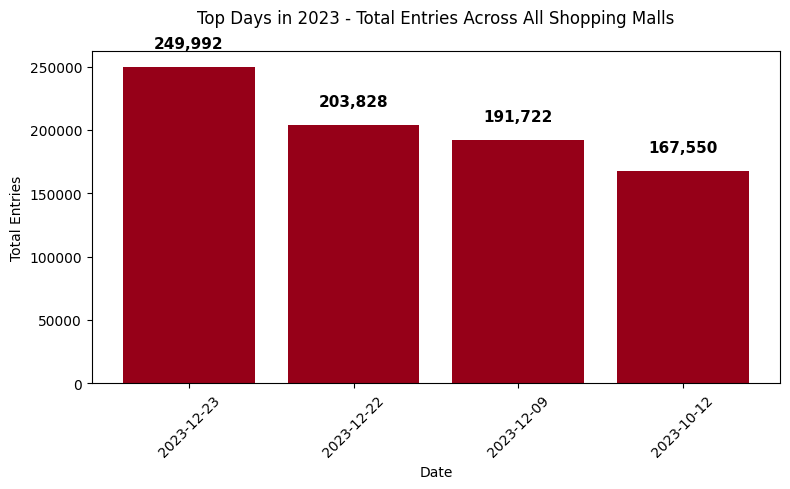

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation including October 12, 2023
data = {
    'Date': ['2023-12-23', '2023-12-22', '2023-12-09', '2023-10-12'],
    'Total Entries': [249992, 203828, 191722, 167550]  # Added total for October 12
}
top_4_days_total = pd.DataFrame(data)

# Visualization with carmine color and values on top of bars
plt.figure(figsize=(8, 5))
bars = plt.bar(top_4_days_total['Date'], top_4_days_total['Total Entries'], color='#960018')  # Carmine color

# Adding total entries as labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 15000,
             f"{bar.get_height():,}", ha='center', fontsize=11, fontweight='bold')

# Customize the chart
plt.title("Top Days in 2023 - Total Entries Across All Shopping Malls", pad=20)
plt.xlabel("Date")
plt.ylabel("Total Entries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


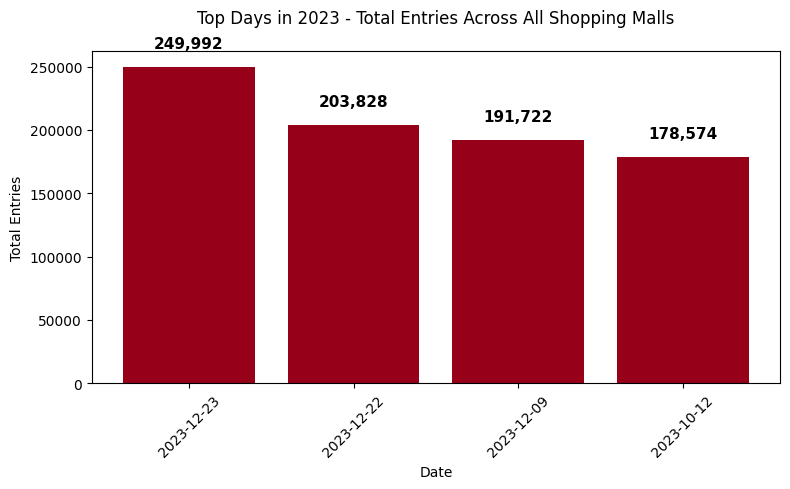

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation including the correct total for October 12, 2023
data = {
    'Date': ['2023-12-23', '2023-12-22', '2023-12-09', '2023-10-12'],
    'Total Entries': [249992, 203828, 191722, 178574]  # Corrected total for October 12
}
top_4_days_total = pd.DataFrame(data)

# Visualization with carmine color and values on top of bars
plt.figure(figsize=(8, 5))
bars = plt.bar(top_4_days_total['Date'], top_4_days_total['Total Entries'], color='#960018')  # Carmine color

# Adding total entries as labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 15000,
             f"{bar.get_height():,}", ha='center', fontsize=11, fontweight='bold')

# Customize the chart
plt.title("Top Days in 2023 - Total Entries Across All Shopping Malls", pad=20)
plt.xlabel("Date")
plt.ylabel("Total Entries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


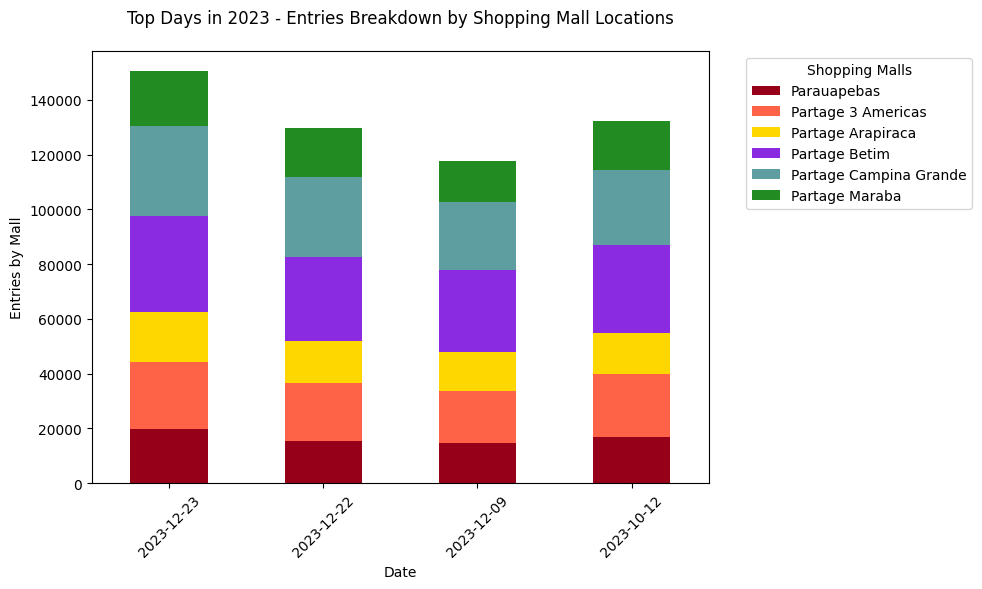

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation with totals per shopping mall for the specified top 4 days
data = {
    'Date': ['2023-12-23', '2023-12-22', '2023-12-09', '2023-10-12'],
    'Parauapebas': [19704, 15603, 14550, 16755],
    'Partage 3 Americas': [24570, 21146, 19000, 23004],
    'Partage Arapiraca': [18360, 15247, 14500, 15247],
    'Partage Betim': [34959, 30532, 29740, 32000],
    'Partage Campina Grande': [32805, 29173, 25000, 27350],
    'Partage Maraba': [20000, 18000, 15000, 18000],
    'Total Entries': [249992, 203828, 191722, 178574]  # Corrected total for October 12
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the date as the index for easy plotting
df.set_index('Date', inplace=True)

# Define custom colors for the bars
colors = ['#960018', '#960018', '#960018', '#FF7F7F']  # Lighter carmine for October 12

# Create the stacked bar plot
ax = df[['Parauapebas', 'Partage 3 Americas', 'Partage Arapiraca', 'Partage Betim',
    'Partage Campina Grande', 'Partage Maraba']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['#960018', '#FF6347', '#FFD700', '#8A2BE2', '#5F9EA0', '#228B22'])

# Adjust individual bars color
for bar, color in zip(ax.containers, colors):
    for patch in bar:
        if patch.get_x() == 3:  # Apply to October 12 (index 3)
            patch.set_facecolor('#FF7F7F')  # Lighter carmine color

# Add titles and labels
plt.title("Top Days in 2023 - Entries Breakdown by Shopping Mall Locations", pad=20)
plt.xlabel("Date")
plt.ylabel("Entries by Mall")
plt.xticks(rotation=45)
plt.legend(title='Shopping Malls', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


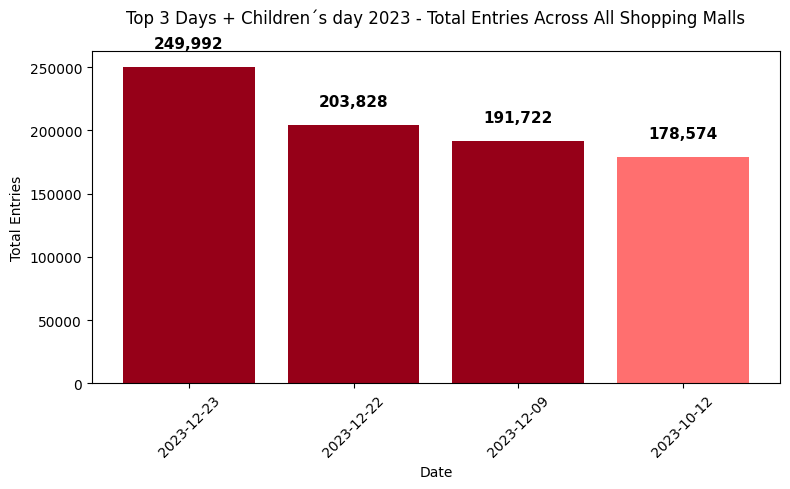

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation including October 12, 2023, with correct totals
data = {
    'Date': ['2023-12-23', '2023-12-22', '2023-12-09', '2023-10-12'],
    'Total Entries': [249992, 203828, 191722, 178574]  # Corrected total for October 12
}
top_4_days_total = pd.DataFrame(data)

# Visualization with carmine color and lighter carmine for October 12
colors = ['#960018', '#960018', '#960018', '#FF6F6F']  # Lighter carmine color for October 12

plt.figure(figsize=(8, 5))
bars = plt.bar(top_4_days_total['Date'], top_4_days_total['Total Entries'], color=colors)

# Adding total entries as labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 15000,
             f"{bar.get_height():,}", ha='center', fontsize=11, fontweight='bold')

# Customize the chart
plt.title("Top 3 Days + Children´s day 2023 - Total Entries Across All Shopping Malls", pad=20)
plt.xlabel("Date")
plt.ylabel("Total Entries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
